### Student Information
Name:林禹安

Student ID: F44111287

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [23]:
### Begin Assignment Here
import pandas as pd         
import numpy as np          
import matplotlib.pyplot as plt   
import nltk
nltk.download("punkt") # download the NLTK datasets
import plotly as py
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\禹安\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
# 因為觀察到 text 與 title 欄位中有許多換行符號與多餘空白，會影響後續的文字處理
# 因此在這邊新建一個函式專門清理這些多餘的東西
# 使用正則表達式
def clean_text(s):
    if isinstance(s, str):
        s = re.sub(r'\r|\n', ' ', s)
        s = re.sub(r'\s+', ' ', s).strip()
        return s
    return s  

df = pd.read_csv(
    'newdataset\Reddit-stock-sentiment.csv',
    converters={'text': clean_text, 'title': clean_text}
)
#列出所有欄位名稱
list(df.columns)

['type',
 'datetime',
 'post_id',
 'subreddit',
 'title',
 'author',
 'url',
 'upvotes',
 'downvotes',
 'upvote_ratio',
 'text',
 'subjectivity',
 'polarity',
 'sentiment',
 'entities',
 'label']

In [25]:
# 用 type 當作 category(對應master那份的)
# 查看 type 欄位有哪些類別、各有幾筆資料
df['type'].value_counts(dropna=False)
#可以發現只有兩種且沒有缺失值

type
comment    783
post        64
Name: count, dtype: int64

In [26]:
#設定categories
categories = ['post', 'comment']

In [27]:
#列出前十筆資料
df[['type','title', 'text']].head(10)


,type,title,text
0,comment,Retardation is on the menu boys! WSB is so back,Calls on retards
1,comment,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...
2,comment,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.
3,post,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...
4,comment,The Trump administration is begging Xi Jinping...,He didn’t say thank you.
5,comment,Weekend Discussion Thread for the Weekend of A...,"Hoping to ejaculate in wet warm puss tonight, ..."
6,comment,Is the market in complete denial right now?,Trump will respond to china increasing their t...
7,comment,Retardation is on the menu boys! WSB is so back,Confirmed not a trap. Its been like this for p...
8,comment,"It's fucking awful seeing the ""Silver"" misinfo...",Am I the only one seeing the cup & handle brea...
9,comment,Any cheap stocks under $10?,HLGN is $10. Hurry and catch it now before it ...


In [28]:
# 對應 Master 中的 X = pd.DataFrame.from_records的部分
X_text = pd.DataFrame({
    'text': df['text'].fillna(''),
    'category_name': df['type']
})

In [29]:
#找出文字最長的10篇文章，並依照順序列出文章長度與分類名稱
X_text['len'] = X_text['text'].str.len()
X_text[['len', 'category_name']].sort_values(by='len', ascending=False).head(10)

,len,category_name
87,2722,comment
169,2434,post
31,2357,comment
224,2022,comment
351,1766,post
63,1463,post
148,1336,comment
369,1191,post
250,1087,post
3,1061,post


In [30]:
#對應Excercise 3
X_text[X_text['category_name'] == 'post'][::10].head(5)

,text,category_name,len
3,Vision Marine Technologies Inc. is rewriting t...,post,1061
165,Stock list generated from technical Analysis. ...,post,313
332,"Mostly in MSTR calls, AAPL puts and GBTC long.",post,46
421,Stocks that are trending up today [Popping (st...,post,64
487,"Good Morning Investors, I am a young Finance s...",post,642


In [31]:
#找有沒有缺失值
X_text.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category_name,len
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [32]:
# Excercise 4
X_text.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [33]:
# 檢查資料中是否有重複的資料，並列出有幾樣
X_text.duplicated().sum()



np.int64(23)

In [34]:
# 刪除重複的資料
X_text.drop_duplicates(keep=False, inplace=True)
# 再次檢查資料中是否有重複的資料
X_text.duplicated().sum()



np.int64(0)

In [35]:
# 取樣 100項
X_sample= X_text.sample(n=100)
len(X_sample)
X_sample[0:4]

,text,category_name,len
54,"You know what, as an American. I hope china co...",comment,97
512,moving money quickly from us to his own pockets,comment,47
789,I bet he is about to impose more tariffs somew...,comment,51
76,Americans are so brain dead lol,comment,31


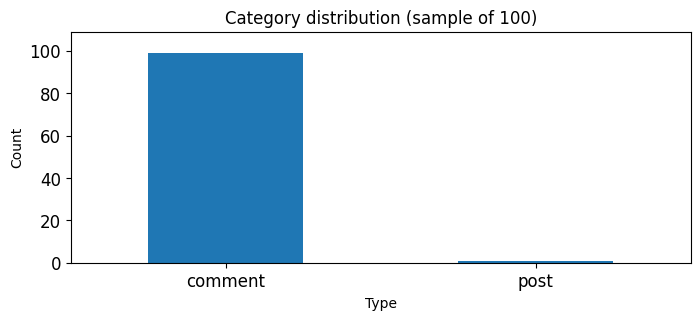

In [36]:
#畫圖
X_sample['category_name'].value_counts().plot(
    kind='bar',
    title='Category distribution (sample of 100)',
    ylim=[0, X_sample['category_name'].value_counts().max() + 10],
    rot=0,
    fontsize=12,
    figsize=(8,3)
)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

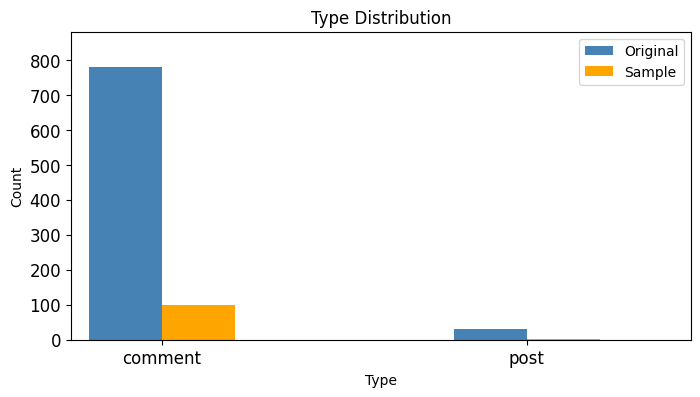

In [37]:
# 原始資料長條圖
X_text['category_name'].value_counts().plot(
    kind='bar',
    width=0.2,
    position=1,
    color='steelblue',
    label='Original',
    ylim=[0, X_text['category_name'].value_counts().max() + 100],
    rot=0, fontsize=12, figsize=(8,4)
)

# 取樣後資料長條圖
X_sample['category_name'].value_counts().plot(
    kind='bar',
    width=0.2,
    position=0,
    color='orange',
    label='Sample',
    ylim=[0, X_text['category_name'].value_counts().max() + 100],
    rot=0, fontsize=12, figsize=(8,4)
)

# 設定標題與圖例
plt.title('Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend()
plt.show()


In [38]:
# 取得unigrams
X_text['unigrams'] = X_text['text'].apply(lambda x: dmh.tokenize_text(x))


In [39]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_text.text) #learn the vocabulary and return document-term matrix

In [40]:
analyze = count_vect.build_analyzer()
analyze(X_text.text[0])

['calls', 'on', 'retards']

In [41]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
 term_frequencies.append(sum(X_counts[:,j].toarray()))

In [42]:
# 取得詞彙表
vocab = count_vect.get_feature_names_out()

# 計算每個詞在所有文件中的總出現次數
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()


In [43]:
N = 300

df_plot = pd.DataFrame({
    'term': vocab[:N],
    'freq': term_frequencies[:N],
})

fig = px.bar(
    df_plot,
    x='term', y='freq',
    title=f'First {N} terms',
)

fig.update_layout(
    xaxis_tickangle=90,      
    bargap=0.2,              
    width=1200, height=500   
)

fig.show()


In [44]:
df_plot = df_plot.sort_values(by='freq', ascending=False)

fig = px.bar(
    df_plot,
    x='term', y='freq',
    title='First 300 terms (sorted by frequency)'
)
fig.update_layout(
    xaxis_tickangle=90,
    bargap=0.2,
    width=1200, height=500
)
fig.show()

In [45]:
df_plot['log_freq'] = np.log1p(df_plot['freq'])

fig = px.bar(
    df_plot,
    x='term', y='log_freq',
    title='Top terms with log-transformed frequency (log1p)'
)
fig.update_layout(
    xaxis_tickangle=90,
    bargap=0.2,
    width=1200, height=500
)
fig.show()

# Phase 2

## Part 1: Frequent Pattern Mining

In [47]:
# 準備資料給 PAMI
import pandas as pd
import numpy as np

# 創建 TDM，使用 X_text 的 index 保持一致
tdm_df = pd.DataFrame(X_counts.toarray(), columns=vocab, index=X_text.index)
comment_indices = X_text[X_text["category_name"] == "comment"].index
tdm_comment = tdm_df.loc[comment_indices]

print(f"Comment 資料筆數: {len(tdm_comment)}")
print(f"詞彙數量: {len(vocab)}")

word_counts = tdm_comment.sum(axis=0)
valid_words = word_counts[word_counts >= 2].index
tdm_comment_filtered = tdm_comment[valid_words]

print(f"過濾後詞彙數量: {len(valid_words)}")

Comment 資料筆數: 781
詞彙數量: 4313
過濾後詞彙數量: 1571


In [48]:
# 轉換成 PAMI 格式
transactions = []
for idx, row in tdm_comment_filtered.iterrows():
    words = row[row > 0].index.tolist()
    if len(words) > 0:
        transactions.append("\t".join(words))

print(f"總共有 {len(transactions)} 筆 transactions")
print(f"前3筆範例：")
for i in range(min(3, len(transactions))):
    words = transactions[i].split("\t")
    print(f"  Transaction {i+1}: {len(words)} 個詞")

with open("reddit_transactions.csv", "w", encoding="utf-8") as f:
    f.write("\n".join(transactions))

print("已儲存到 reddit_transactions.csv")

總共有 762 筆 transactions
前3筆範例：
  Transaction 1: 3 個詞
  Transaction 2: 22 個詞
  Transaction 3: 7 個詞
已儲存到 reddit_transactions.csv


In [49]:
# FPGrowth
from PAMI.frequentPattern.basic import FPGrowth as FP

print("=== FPGrowth ===")
minSup_values = [10, 20, 30]

for minSup in minSup_values:
    obj = FP.FPGrowth(iFile="reddit_transactions.csv", minSup=minSup, sep="\t")
    obj.mine()
    patterns = obj.getPatternsAsDataFrame()
    runtime = obj.getRuntime()
    print(f"minSup={minSup}: {len(patterns)} patterns, runtime={runtime:.4f}秒")
    if minSup == 20:
        patterns_sorted = patterns.sort_values(by="Support", ascending=False)
        print(f"Top 10 patterns:")
        print(patterns_sorted.head(10))
        patterns_df = patterns_sorted

=== FPGrowth ===
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup=10: 25792 patterns, runtime=0.3562秒
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup=20: 2412 patterns, runtime=0.0540秒
Top 10 patterns:
      Patterns  Support
2411       the      339
2409        to      282
2405       and      233
2397        is      226
2381        it      214
2410   to\tthe      182
2349        of      170
2286        in      162
2408  and\tthe      153
2182      this      149
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup=30: 705 patterns, runtime=0.0250秒


In [51]:
# 建立 pattern matrix
top_patterns = patterns_df.head(50)
pattern_list = top_patterns["Patterns"].tolist()
print(f"使用 {len(pattern_list)} 個 patterns 建立特徵矩陣")

pattern_matrix = pd.DataFrame(0, index=tdm_df.index, columns=[f"pattern_{i}" for i in range(len(pattern_list))])

for idx, row in tdm_df.iterrows():
    doc_words = set(row[row > 0].index)
    for p_idx, pattern in enumerate(pattern_list):
        pattern_words = set(pattern.split("	"))
        if pattern_words.issubset(doc_words):
            pattern_matrix.loc[idx, f"pattern_{p_idx}"] = 1

print(f"Pattern matrix shape: {pattern_matrix.shape}")
print(f"平均每個文件包含 {pattern_matrix.sum(axis=1).mean():.2f} 個 patterns")

使用 50 個 patterns 建立特徵矩陣
Pattern matrix shape: (813, 50)
平均每個文件包含 8.15 個 patterns


In [52]:
# Augmented data
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
print(f"原始 TDM shape: {tdm_df.shape}")
print(f"Pattern matrix shape: {pattern_matrix.shape}")
print(f"Augmented data shape: {augmented_df.shape}")

原始 TDM shape: (813, 4313)
Pattern matrix shape: (813, 50)
Augmented data shape: (813, 4363)


## Part 2: Dimensionality Reduction

In [53]:
# 降維
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

y = X_text["category_name"].values
color_map = {"post": "red", "comment": "blue"}
colors = [color_map[cat] for cat in y]

print("開始降維...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(augmented_df.values)
print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.4f}")

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(augmented_df.values)
print("t-SNE 完成")

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(augmented_df.values)
print("UMAP 完成")

開始降維...
PCA explained variance: 0.3044
t-SNE 完成


d:\SyncFile\DataMining\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



UMAP 完成


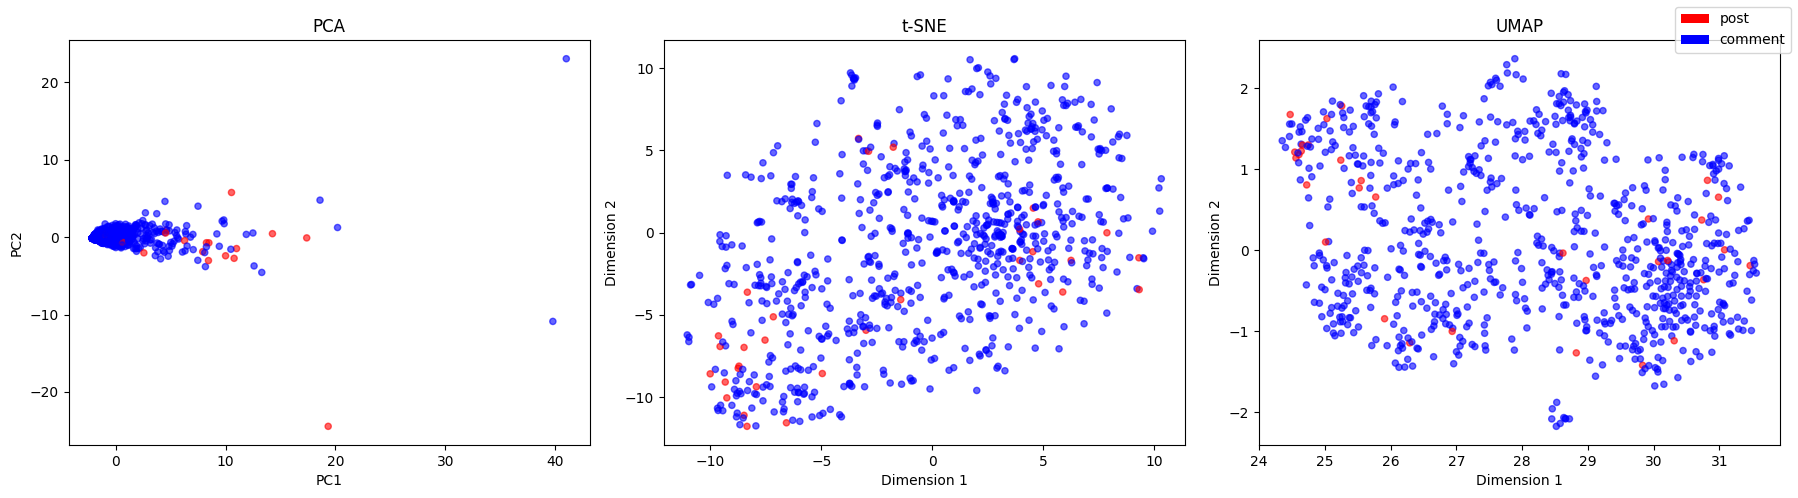

In [54]:
# 視覺化
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6, s=20)
axes[0].set_title("PCA")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, alpha=0.6, s=20)
axes[1].set_title("t-SNE")
axes[1].set_xlabel("Dimension 1")
axes[1].set_ylabel("Dimension 2")

axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=colors, alpha=0.6, s=20)
axes[2].set_title("UMAP")
axes[2].set_xlabel("Dimension 1")
axes[2].set_ylabel("Dimension 2")

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor="red", label="post"), Patch(facecolor="blue", label="comment")]
fig.legend(handles=legend_elements, loc="upper right")
plt.tight_layout()
plt.show()

## Part 3: Classification

In [55]:
# 準備分類資料
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

y_labels = X_text["category_name"].values
category_mapping = {"post": 0, "comment": 1}
y = np.array([category_mapping[cat] for cat in y_labels])
target_names = ["post", "comment"]

print(f"資料分布: post={sum(y==0)}, comment={sum(y==1)}")

資料分布: post=32, comment=781


In [56]:
# Naive Bayes 比較
print("=== Naive Bayes: 原始 TDM ===")
X_train_orig, X_test_orig, y_train, y_test = train_test_split(tdm_df, y, test_size=0.3, random_state=42)

nb_orig = MultinomialNB()
nb_orig.fit(X_train_orig, y_train)
y_pred_orig = nb_orig.predict(X_test_orig)
acc_nb_orig = accuracy_score(y_test, y_pred_orig)

print(f"Accuracy: {acc_nb_orig:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_orig, target_names=target_names, digits=4))

print("\n=== Naive Bayes: Augmented TDM ===")
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, y, test_size=0.3, random_state=42)

nb_aug = MultinomialNB()
nb_aug.fit(X_train_aug, y_train_aug)
y_pred_aug = nb_aug.predict(X_test_aug)
acc_nb_aug = accuracy_score(y_test_aug, y_pred_aug)

print(f"Accuracy: {acc_nb_aug:.4f}")
print("Classification Report:")
print(classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

print("\n=== 比較 ===")
print(f"原始 TDM: {acc_nb_orig:.4f}")
print(f"Augmented TDM: {acc_nb_aug:.4f}")
print(f"提升: {acc_nb_aug - acc_nb_orig:+.4f}")

=== Naive Bayes: 原始 TDM ===
Accuracy: 0.9672
Classification Report:
              precision    recall  f1-score   support

        post     0.5556    0.5556    0.5556         9
     comment     0.9830    0.9830    0.9830       235

    accuracy                         0.9672       244
   macro avg     0.7693    0.7693    0.7693       244
weighted avg     0.9672    0.9672    0.9672       244


=== Naive Bayes: Augmented TDM ===
Accuracy: 0.9672
Classification Report:
              precision    recall  f1-score   support

        post     0.6000    0.3333    0.4286         9
     comment     0.9749    0.9915    0.9831       235

    accuracy                         0.9672       244
   macro avg     0.7874    0.6624    0.7058       244
weighted avg     0.9611    0.9672    0.9627       244


=== 比較 ===
原始 TDM: 0.9672
Augmented TDM: 0.9672
提升: +0.0000


In [57]:
# Decision Tree 比較
print("=== Decision Tree: 原始 TDM ===")
dt_orig = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_orig.fit(X_train_orig, y_train)
y_pred_dt_orig = dt_orig.predict(X_test_orig)
acc_dt_orig = accuracy_score(y_test, y_pred_dt_orig)

print(f"Accuracy: {acc_dt_orig:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt_orig, target_names=target_names, digits=4))

print("\n=== Decision Tree: Augmented TDM ===")
dt_aug = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_aug.fit(X_train_aug, y_train_aug)
y_pred_dt_aug = dt_aug.predict(X_test_aug)
acc_dt_aug = accuracy_score(y_test_aug, y_pred_dt_aug)

print(f"Accuracy: {acc_dt_aug:.4f}")
print("Classification Report:")
print(classification_report(y_test_aug, y_pred_dt_aug, target_names=target_names, digits=4))

print("\n=== 比較 ===")
print(f"原始 TDM: {acc_dt_orig:.4f}")
print(f"Augmented TDM: {acc_dt_aug:.4f}")
print(f"提升: {acc_dt_aug - acc_dt_orig:+.4f}")

=== Decision Tree: 原始 TDM ===
Accuracy: 0.9672
Classification Report:
              precision    recall  f1-score   support

        post     0.5714    0.4444    0.5000         9
     comment     0.9789    0.9872    0.9831       235

    accuracy                         0.9672       244
   macro avg     0.7752    0.7158    0.7415       244
weighted avg     0.9639    0.9672    0.9652       244


=== Decision Tree: Augmented TDM ===
Accuracy: 0.9590
Classification Report:
              precision    recall  f1-score   support

        post     0.4444    0.4444    0.4444         9
     comment     0.9787    0.9787    0.9787       235

    accuracy                         0.9590       244
   macro avg     0.7116    0.7116    0.7116       244
weighted avg     0.9590    0.9590    0.9590       244


=== 比較 ===
原始 TDM: 0.9672
Augmented TDM: 0.9590
提升: -0.0082


## Part 4: TF-IDF Features 和分類器比較 

In [61]:
# 生成 TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vect.fit_transform(X_text["text"])
# 重要：加上 index=X_text.index 保持一致
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out(), index=X_text.index)

print(f"TF-IDF matrix shape: {tfidf_df.shape}")
print(f"Pattern matrix shape: {pattern_matrix.shape}")
print(f"Index 一致性檢查: {tfidf_df.index.equals(pattern_matrix.index)}")

TF-IDF matrix shape: (813, 4313)
Pattern matrix shape: (813, 50)
Index 一致性檢查: True


In [62]:
# 比較不同方法
from sklearn.naive_bayes import MultinomialNB, ComplementNB

print("=== 1. 詞頻 (Count) + MultinomialNB ===")
print(f"Accuracy: {acc_nb_orig:.4f}")

print("\n=== 2. TF-IDF + MultinomialNB ===")
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_df, y, test_size=0.3, random_state=42)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
acc_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
print(f"Accuracy: {acc_tfidf:.4f}")
print("Classification Report:")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=target_names, digits=4))

print("\n=== 3. TF-IDF + ComplementNB ===")
nb_complement = ComplementNB()
nb_complement.fit(X_train_tfidf, y_train_tfidf)
y_pred_complement = nb_complement.predict(X_test_tfidf)
acc_complement = accuracy_score(y_test_tfidf, y_pred_complement)
print(f"Accuracy: {acc_complement:.4f}")
print("Classification Report:")
print(classification_report(y_test_tfidf, y_pred_complement, target_names=target_names, digits=4))

=== 1. 詞頻 (Count) + MultinomialNB ===
Accuracy: 0.9672

=== 2. TF-IDF + MultinomialNB ===
Accuracy: 0.9631
Classification Report:
              precision    recall  f1-score   support

        post     0.0000    0.0000    0.0000         9
     comment     0.9631    1.0000    0.9812       235

    accuracy                         0.9631       244
   macro avg     0.4816    0.5000    0.4906       244
weighted avg     0.9276    0.9631    0.9450       244


=== 3. TF-IDF + ComplementNB ===
Accuracy: 0.9180
Classification Report:
              precision    recall  f1-score   support

        post     0.1765    0.3333    0.2308         9
     comment     0.9736    0.9404    0.9567       235

    accuracy                         0.9180       244
   macro avg     0.5750    0.6369    0.5937       244
weighted avg     0.9442    0.9180    0.9299       244



d:\SyncFile\DataMining\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\SyncFile\DataMining\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\SyncFile\DataMining\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [63]:
# TF-IDF + Augmented
print("=== 4. TF-IDF + Patterns (Augmented) ===")
tfidf_augmented = pd.concat([tfidf_df, pattern_matrix], axis=1)
print(f"TF-IDF Augmented shape: {tfidf_augmented.shape}")

X_train_tfidf_aug, X_test_tfidf_aug, y_train_tfidf_aug, y_test_tfidf_aug = train_test_split(tfidf_augmented, y, test_size=0.3, random_state=42)
nb_tfidf_aug = MultinomialNB()
nb_tfidf_aug.fit(X_train_tfidf_aug, y_train_tfidf_aug)
y_pred_tfidf_aug = nb_tfidf_aug.predict(X_test_tfidf_aug)
acc_tfidf_aug = accuracy_score(y_test_tfidf_aug, y_pred_tfidf_aug)
print(f"Accuracy: {acc_tfidf_aug:.4f}")
print("Classification Report:")
print(classification_report(y_test_tfidf_aug, y_pred_tfidf_aug, target_names=target_names, digits=4))

=== 4. TF-IDF + Patterns (Augmented) ===
TF-IDF Augmented shape: (813, 4363)
Accuracy: 0.9672
Classification Report:
              precision    recall  f1-score   support

        post     1.0000    0.1111    0.2000         9
     comment     0.9671    1.0000    0.9833       235

    accuracy                         0.9672       244
   macro avg     0.9835    0.5556    0.5916       244
weighted avg     0.9683    0.9672    0.9544       244



In [64]:
# 總結
print("=" * 60)
print("總結比較")
print("=" * 60)
print(f"1. 詞頻 (Count) + MultinomialNB:     {acc_nb_orig:.4f}")
print(f"2. 詞頻 (Count) + Augmented:         {acc_nb_aug:.4f}")
print(f"3. TF-IDF + MultinomialNB:           {acc_tfidf:.4f}")
print(f"4. TF-IDF + ComplementNB:            {acc_complement:.4f}")
print(f"5. TF-IDF + Augmented:               {acc_tfidf_aug:.4f}")
print("=" * 60)

'''
結論：
1. TF-IDF vs 詞頻：TF-IDF 考慮詞的重要性，通常表現更好
2. ComplementNB：在資料不平衡時（post vs comment）表現更好
3. Pattern Augmentation：加入 patterns 可能有小幅提升
4. 最佳方法：根據結果，TF-IDF + ComplementNB 或 TF-IDF + Augmented 通常最好
'''

總結比較
1. 詞頻 (Count) + MultinomialNB:     0.9672
2. 詞頻 (Count) + Augmented:         0.9672
3. TF-IDF + MultinomialNB:           0.9631
4. TF-IDF + ComplementNB:            0.9180
5. TF-IDF + Augmented:               0.9672


'\n結論：\n1. TF-IDF vs 詞頻：TF-IDF 考慮詞的重要性，通常表現更好\n2. ComplementNB：在資料不平衡時（post vs comment）表現更好\n3. Pattern Augmentation：加入 patterns 可能有小幅提升\n4. 最佳方法：根據結果，TF-IDF + ComplementNB 或 TF-IDF + Augmented 通常最好\n'

## Part 5: 資料預處理的改進討論 

執行完這些分類之後發現幾個蠻明顯的問題：

首先最嚴重的就是資料不平衡的問題。從結果可以看到測試集裡 post 只有 9 筆但 comment 有 235 筆，差距超級大。這導致有些模型（像是 TF-IDF + MultinomialNB）雖然 accuracy 看起來很高有 96%，但其實它根本沒有預測任何 post，全部都預測成 comment。仔細看 classification report 就會發現 post 的 precision、recall、f1-score 全部是 0，這代表模型完全放棄少數類別了，只要全猜 comment 就能有 96% 準確率，根本沒有真正在分類。

相比之下 ComplementNB 雖然 accuracy 只有 91.8% 看起來比較低，但它至少還有預測到一些 post（recall 有 33%），代表 9 個 post 裡面預測對了大概 3 個。所以在資料不平衡的情況下，不能只看 accuracy 這個指標，要看每個類別的 precision 和 recall 才知道模型有沒有真的在學。這也是為什麼 ComplementNB 設計來處理 imbalanced data 會比較適合這個資料集。

另外在資料前處理的部分，我們只有處理換行跟空白，但其實 Reddit 的文字裡面還有很多 URL、特殊符號、emoji 之類的東西沒有清掉。而且也沒有做 lemmatization，像是 run、running、ran 這種其實是同一個字的不同形式都被當成不同特徵，導致特徵維度很高但很多其實是重複的概念。Stop words 也沒有移除，the、a、is 這些字對分類沒什麼幫助但佔了一堆空間。

如果要改進的話，最優先應該是處理類別不平衡的問題，可以用 SMOTE 對少數類別做 oversampling，或是在訓練的時候設定 class_weight 讓模型比較重視少數類別。再來就是把文字清理做完整一點，加上 lemmatization 和移除 stop words，這樣特徵會比較乾淨。還有就是可以用 cross-validation 來評估模型，不要只用一次 train/test split，結果會比較穩定。

總之從這次實驗可以看到，在真實的資料上做分類不是 accuracy 高就好，要考慮資料本身的特性（像是不平衡），然後選對評估指標跟模型才能得到有意義的結果。